# Setup

In [8]:
import sys
import os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from src.tasks.embed_unsup import train_node2vec, train_dgi, linear_probe, plot_tsne, plot_umap
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

# Node2Vec

In [9]:
# Load Cora dataset
dataset = Planetoid(root="data/Cora", name="Cora", transform=NormalizeFeatures())
data = dataset[0]

# Train Node2Vec
n2v_emb = train_node2vec(data.edge_index, embedding_dim=128, walk_length=10, context_size=10, 
                     walks_per_node=10, num_negative_samples=2, p=1, q=2, epochs=200, lr=0.005, sparse=False)

Epoch 020, Loss: 86.5208
Epoch 040, Loss: 47.1227
Epoch 060, Loss: 30.1972
Epoch 080, Loss: 23.1827
Epoch 100, Loss: 20.2305
Epoch 120, Loss: 19.0154
Epoch 140, Loss: 18.4214
Epoch 160, Loss: 18.1017
Epoch 180, Loss: 17.9821
Epoch 200, Loss: 17.9231


In [ ]:
n2v_val_acc, n2v_test_acc = linear_probe(
    n2v_emb, data.y, data.train_mask, data.val_mask, data.test_mask, lr=0.1, wd=0.0, epochs=2000
)
print(f"Linear probe val accuracy: {n2v_val_acc:.4f}")
print(f"Linear probe test accuracy: {n2v_test_acc:.4f}")

Linear probe val accuracy: 0.6460
Linear probe test accuracy: 0.6600


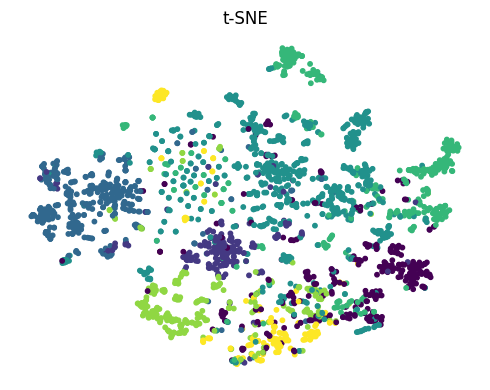

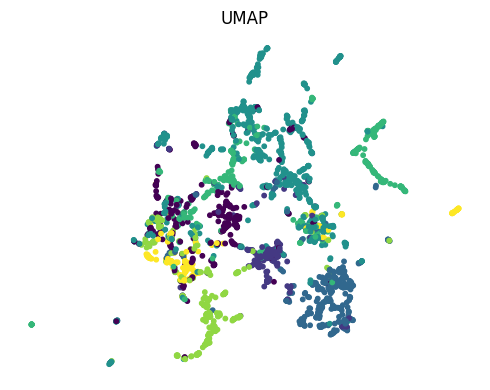

In [13]:
# Plot embeddings
plot_tsne(n2v_emb, data.y)
plot_umap(n2v_emb, data.y)

# DGI

In [14]:
# Load Cora dataset
dataset = Planetoid(root="data/Cora", name="Cora", transform=NormalizeFeatures())
data = dataset[0]

dgi_emb = train_dgi(
    data,
    hid=64,        # embedding size
    dropout=0.5,   # a bit of regularization
    epochs=300,    # typical for DGI on Cora
    lr=0.001
)

Epoch 020 | Loss: 1.3583 | ||z||: 0.06 | pos_score: 0.51, neg_score: 0.51
Epoch 040 | Loss: 1.2025 | ||z||: 0.11 | pos_score: 0.56, neg_score: 0.55
Epoch 060 | Loss: 0.8206 | ||z||: 0.17 | pos_score: 0.60, neg_score: 0.59
Epoch 080 | Loss: 0.4881 | ||z||: 0.19 | pos_score: 0.62, neg_score: 0.61
Epoch 100 | Loss: 0.3768 | ||z||: 0.21 | pos_score: 0.63, neg_score: 0.61
Epoch 120 | Loss: 0.2886 | ||z||: 0.21 | pos_score: 0.63, neg_score: 0.61
Epoch 140 | Loss: 0.2394 | ||z||: 0.21 | pos_score: 0.64, neg_score: 0.62
Epoch 160 | Loss: 0.2509 | ||z||: 0.21 | pos_score: 0.64, neg_score: 0.62
Epoch 180 | Loss: 0.2263 | ||z||: 0.21 | pos_score: 0.64, neg_score: 0.62
Epoch 200 | Loss: 0.1787 | ||z||: 0.21 | pos_score: 0.64, neg_score: 0.62
Epoch 220 | Loss: 0.1775 | ||z||: 0.22 | pos_score: 0.65, neg_score: 0.62
Epoch 240 | Loss: 0.1999 | ||z||: 0.22 | pos_score: 0.65, neg_score: 0.62
Epoch 260 | Loss: 0.1809 | ||z||: 0.22 | pos_score: 0.65, neg_score: 0.62
Epoch 280 | Loss: 0.1522 | ||z||: 0.22

In [15]:
dgi_val_acc, dgi_test_acc = linear_probe(
    dgi_emb, data.y, data.train_mask, data.val_mask, data.test_mask, lr=0.1, wd=0.0, epochs=2000
)
print(f"Linear probe val accuracy: {dgi_val_acc:.4f}")
print(f"Linear probe test accuracy: {dgi_test_acc:.4f}")

Linear probe val accuracy: 0.7580
Linear probe test accuracy: 0.7830


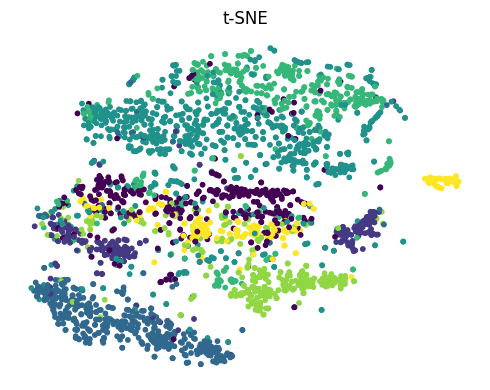

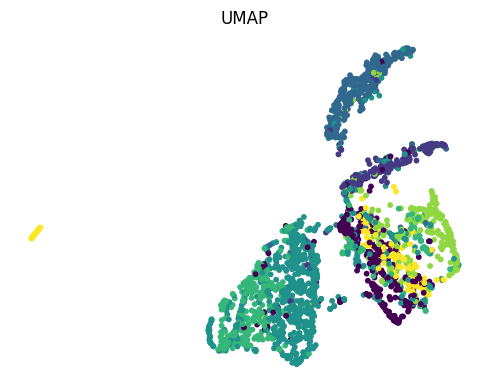

In [16]:
# Plot embeddings
plot_tsne(dgi_emb, data.y)
plot_umap(dgi_emb, data.y)